<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install sklearn-lvq

In [2]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d
from sklearn.mixture import GaussianMixture
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import statsmodels.api as sm
from sklearn_lvq import GlvqModel
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Para acomodar la información si viene por minuto y en registros, 
#df = pd.read_csv('rg1.csv')
## aqui agrupamos por minuto
#df_grouped_multiple = df.groupby(['YEAR','MONTH','DAY','HOUR']).agg({'RG1': ['mean']})
#df_grouped_multiple.columns = ['rg1_mean']
#df_grouped_multiple = df_grouped_multiple.reset_index()
## aquí pivoteamos
#df1 = df_grouped_multiple.pivot(index=['YEAR','MONTH','DAY'], columns='HOUR', values='rg1_mean').dropna()
#print(df1) #df1.to_csv('res.csv')
#df1.columns = [['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17', '18','19', '20', '21', '22', '23']]

In [4]:
CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
def print_serie(serie_,title_,):
    fig, ax1 = plt.subplots(figsize=(7,4))
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('horas', color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('radiación solar', color=LETRASNARA, fontsize='large')
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)    
    for p in serie_:
        plt.plot(p,alpha=0.4)
    plt.show()

In [5]:
def scatterplot(X_,Y_,tags_,centers_,title_,namefile_ ):
    fig, ax1 = plt.subplots(figsize=(4,4))
    CYAN = '#76ced6' ; LILA = '#777bd4'; VERDE='#17cb49'; LETRASNARA ='#ff8000'; AZUL='#168fff'; OTROAZUL = "b-"; ROJO= "r-";
    for k in centers_:
        x = k[7]; y = k[8]
        plt.plot(x,y,"o",color="red",)
    plt.title(title_,fontsize='x-large',color=LETRASNARA)
    ax1.set_xlabel('hora 7',  color=LETRASNARA, fontsize='large')
    ax1.set_ylabel('hora 8',  color=LETRASNARA, fontsize='large')
    plt.scatter(X_, Y_, c=tags_, alpha=0.3)
    plt.tick_params(colors = LETRASNARA, which='both')
    ax1.spines['bottom'].set_color(LETRASNARA)
    ax1.spines['top'   ].set_color(LETRASNARA) 
    ax1.spines['right' ].set_color(LETRASNARA)
    ax1.spines['left'  ].set_color(LETRASNARA)
    plt.savefig(namefile_, transparent=True)
    plt.show()

   YEAR  MONTH  DAY  0  1  2  3    4    5    6  ...        17   18   19   20  \
0  2018      1    1  0  0  0  0  0.0  0.0  0.0  ...  0.000000  0.0  0.0  0.0   
1  2018      1    2  0  0  0  0  0.0  0.0  0.0  ...  0.000000  0.0  0.0  0.0   
2  2018      1    3  0  0  0  0  0.0  0.0  0.0  ...  0.000000  0.0  0.0  0.0   
3  2018      1    4  0  0  0  0  0.0  0.0  0.0  ...  0.000000  0.0  0.0  0.0   
4  2018      1    5  0  0  0  0  0.0  0.0  0.0  ...  0.033333  0.0  0.0  0.0   

   21  22  23         SUMA        dSUMA   ddSUMA  
0   0   0   0  1942.683333 -1613.866667  1773.45  
1   0   0   0   328.816667 -1613.866667  1773.45  
2   0   0   0   488.400000   159.583333  1773.45  
3   0   0   0  1801.133333  1312.733333  1153.15  
4   0   0   0  1174.666667  -626.466667 -1939.20  

[5 rows x 30 columns]


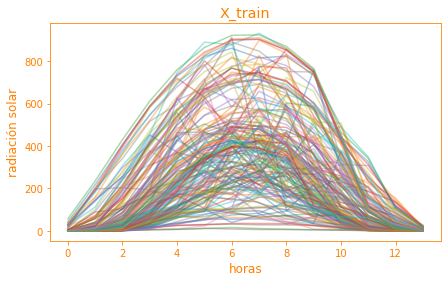

In [6]:
df = pd.read_csv('rg1_horas.csv')
df = df[(df.MONTH==11)|(df.MONTH==12)|(df.MONTH==1)|(df.MONTH==2)|(df.MONTH==3)|(df.MONTH==4)]
print(df.head())
horas_ = ['5','6','7','8','9','10','11','12','13','14','15','16','17','18']
X = df[horas_].to_numpy()
x_total   = df[['SUMA']].to_numpy()
dx_total  = df[['dSUMA']].to_numpy()
ddx_total = df[['ddSUMA']].to_numpy()

#Normalizing the data
#sc = StandardScaler()
#X = sc.fit_transform(X)
#y = sc.fit_transform(Y)

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=.5)#

print_serie(X_train,'X_train')
#print_serie(X_test,'X_test')

# **K-means**


[ 3 13  0  9  1  6  6  2  9  5  1  2  2 13  6  6 11  6  6  8  2  9 11  5
  5  4  6 13  9  6  8  5  6  3  6  9  4  5  9 11  5  5 11  6  0  5  2  6
  6  4  0  2  5  5  7  6  5 12  9  6  9  9 10  6  4  9  2  4  1  6  6  1
  9  5  9 13  3  6  6  6  9  2  4  6 10 10 11  9  2  6  3  0  2  9  0 10
  9  2 10  0  8 11  6  9 10  8  5  0  6  3  5  9  2  9 13  1  1  9 13  6
  4  3  1  6  2  2  6  0  6  9  1  6  4  5  1  6  6  0  8  2  0 11 11  5
  6  5  0  5  3  4  6  6 13  9  6  8 13  4  9  6  8  2  5  6  9  9  9  2
 13  5  2  0  8  5  5  9  0  9  0  6]


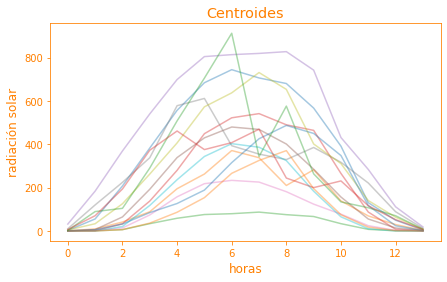

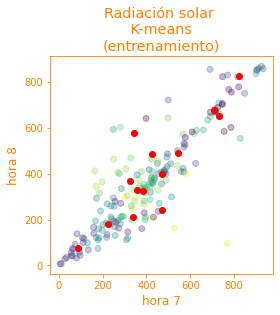

In [7]:
n_clusters = 14
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10) # una variante MiniBatchKMeans  
k_means = k_means.fit(X_train)
values  = k_means.cluster_centers_.squeeze()
labels  = k_means.labels_
centers_= k_means.cluster_centers_
#print('Centroides', centers_)
#print('Exactitud:', k_means.score(X_test))
y_pred = k_means.predict(X_test)
print(y_pred)
print_serie(centers_,'Centroides')
scatterplot(X_train[:,7],X_train[:,8],labels,centers_,'Radiación solar \n K-means \n(entrenamiento)','fig_t13_train')

# **LVQ**

In [8]:
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_rslvq.html
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/index.html
#https://mrnuggelz.github.io/sklearn-lvq/modules/generated/sklearn_lvq.GlvqModel.html#sklearn_lvq.GlvqModel
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_glvq.html#sphx-glr-auto-examples-plot-glvq-py

print('GLVQ:')
glvq = GlvqModel(prototypes_per_class=5, initial_prototypes=None, max_iter=2500, gtol=1e-05)
glvq.fit(X_train,labels)
glvq_pred = glvq.predict(X_test)
print(glvq_pred)
print('classification accuracy:', glvq.score(X_test, glvq_pred))
plt.show()

GLVQ:
[ 8 13  0  9  1  6  9  2  9  5 10  2  2  5  6  6 11  6  6  8  2  9 11  9
  5  4  6 13  9  6  8  5  6  3  6  9  4  5  9 11  5  5 10  6  0  5  2  6
  1  4  0  2  5  5  7  6  5  5  6  6  9  9 10  6  4  9  2  4  9  6  6  1
  9  5  9 13  8  6  2  6  9  2  4  6 10  5 11  9  2  6  3  0  2  9  0 10
  9  2 10  0  8 11  6  9 10  8  5  0  6  3  5  9  2  9 13  1  1  9 13  6
  4  5 11  6  2  2  6  0  6  9  1  6  4  5  1  6  6  0  3  2  0  6 11  5
  6  5  7  5  3  4  6  6 13  9  6  8 13  4  9  6  8  2 13  6  9  9  9  2
  9  5  2  0  8  5  5  9  0  9  0  1]
classification accuracy: 1.0


[ 0  1  2  3  4  5  6  7  8  9 10 11 13]


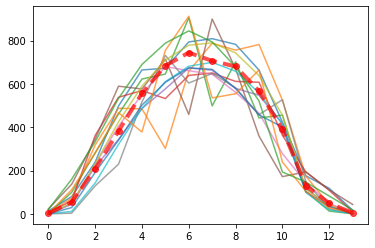

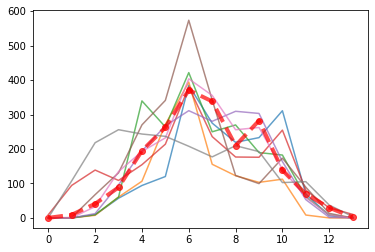

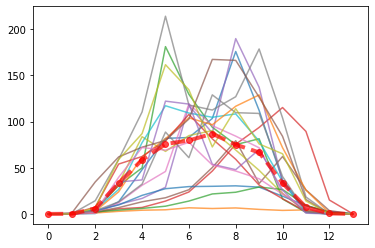

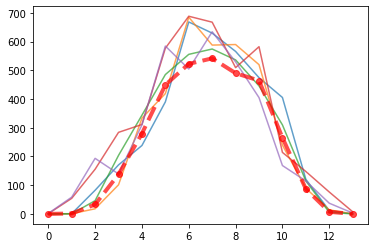

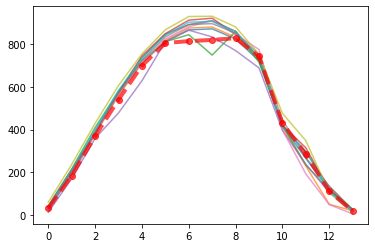

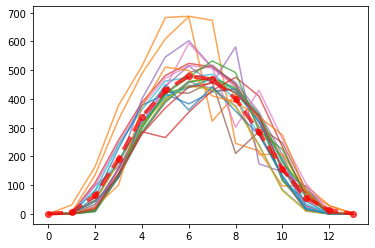

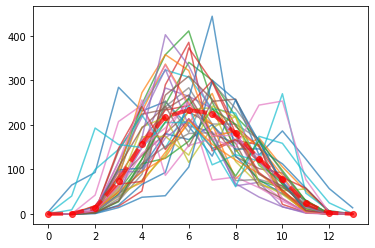

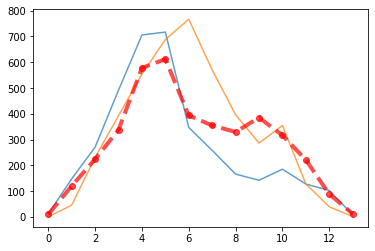

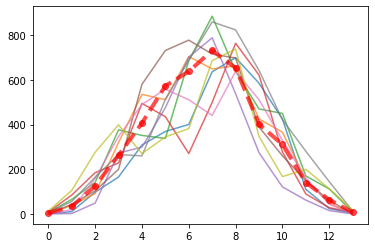

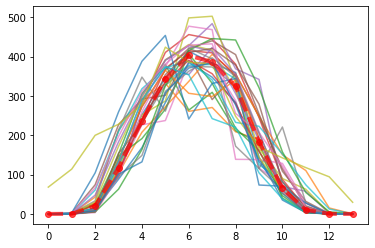

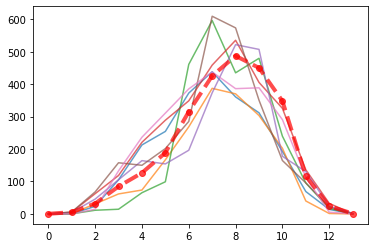

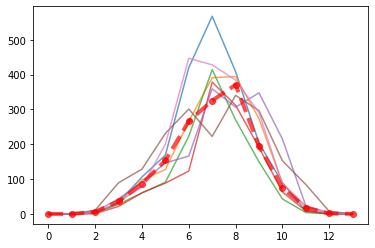

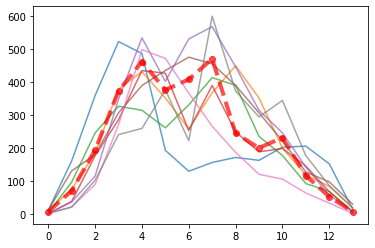

In [23]:
cat = np.unique(glvq_pred)
print(cat)
#plt.figure(figsize=(10, 10))

for c in cat:
    j = 0
    for g in glvq_pred:    
        if c == g:
            plt.plot(X_test[j],alpha=0.7)
        j = j + 1
    plt.plot(centers_[c],alpha=0.7,color='red', linestyle='dashed', marker='o', markerfacecolor='red', linewidth =4)
    plt.show()
    

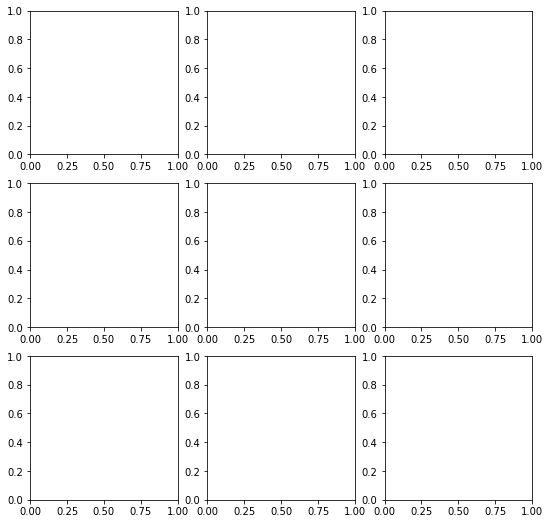

In [10]:
plt.figure(figsize=(9,9))
plt.subplot(331)
plt.subplot(332)
plt.subplot(333)
plt.subplot(334)
plt.subplot(335)
plt.subplot(336)
plt.subplot(337)
plt.subplot(338)
plt.subplot(339)
plt.show()

# **GaussianMixture**

In [11]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
# fit a Gaussian Mixture Model with two components
gm = GaussianMixture(n_components=n_clusters, init_params='kmeans',covariance_type='diag') #full, tied, diag, spherical
gm.fit(X_train)

print(gm.predict(X_test))
gm_pred = gm.predict(X_test)
print('classification accuracy:', gm.score(X_test, gm_pred))


[13 13  8  6 10 13  3  6  3 10 10 12  6 13 10  6  6 10  6  5  1  3  6 10
 10 11  6 13  7  6  8  2  6  2 10  6  0  2  6  6 10  2 10  6  5  3  6  6
 10  0  5 10 10  2 13  6  3  2  6  6 10  6 10  6  0  6  6  0  1  6 10 10
  6 10  3 13 13  6 10  6  6  6  0  7  9 10  6 10  6 10  2  8 12  6  5  9
  3  6  9 13  2 10  6  3 10  5 10  5  6  2  3  2 12  3 13 13 10  3 13 10
  0 10 10  6 12  6  6  5 10 10  1  6  0 10 10  6  7  5  5 10  5  6  6  3
  6  3  5  3 13  0  6  6 13  6  6  5 13  0  3  6  8  6 13  6  6  3  6  6
 13 10  6  5 13 10 10  6  5  6 13 13]
classification accuracy: -55.394437434865765


[ 0  1  2  3  5  6  7  8  9 10 11 12 13]


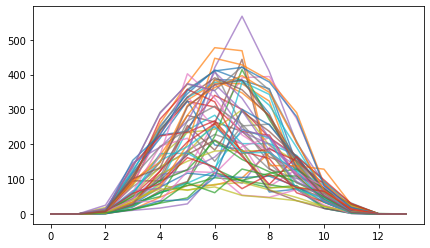

In [12]:
uni = np.unique(gm_pred)
print(uni)
plt.figure(figsize=(7, 4))
j=0
for i in gm_pred:
    if i==6:
      plt.plot(X_test[j],alpha=0.7)
    j = j + 1
plt.show()

# **KNN**

In [13]:
#https://scikit-learn.org/stable/modules/neighbors.html#classification
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(X_train)  #['auto','ball_tree','kd_tree','brute'].
distances, indices = nbrs.kneighbors(X_train)
print(distances, indices)
nbrs.kneighbors_graph(X_train).toarray()

[[  0.          80.95820593 112.86995836 116.79520897 122.04407445]
 [  0.         305.89164019 318.47444909 338.43501918 341.50967572]
 [  0.         110.32143568 113.02984612 117.93915223 121.63392946]
 [  0.          56.19837384  69.76006299  73.41218677  74.29028836]
 [  0.         176.9791159  212.83859427 223.82591009 270.39997941]
 [  0.          59.90085791  62.71188535  65.46405706  86.41752169]
 [  0.         461.71910751 533.28994646 533.76523162 549.24221154]
 [  0.          89.22441274 109.30219452 121.34610958 150.51556032]
 [  0.          80.95820593 105.27743901 109.35452667 109.66046713]
 [  0.         168.10899821 180.07077543 184.95295415 199.8688758 ]
 [  0.         248.72266463 248.88108887 257.60894032 260.84297475]
 [  0.          76.13379666 143.64760598 150.52540756 174.16615233]
 [  0.          65.46405706 101.75857456 103.29214227 109.36705018]
 [  0.          95.78500088 102.38444574 112.22137477 115.2176527 ]
 [  0.         204.87403789 219.18119914 235.848

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, labels)
knn_pred = knn.predict(X_test)
print(knn_pred)
#print(knn.predict_proba(X_test))
knn.score(X_test,knn_pred)

[ 3  7  0  9  1  6  9  2  6  5  1  2  2  5  6  1 11  1  6  8  2  9 11  9
  5  4  6 13  5  6  8  5  6  3  6  9  4  5  9 11  5  5 10  6  0  5  2  6
  6  4  0  2  5  5  7  6  5  5  6  6  9  9 10  6  4  9  2  4  9  6  6  1
  9  5  9  1  5  6  2  6  9  2  4  6  3  5 11  9  2  6  3  0  2  1  0 10
  1  2 10  0  5  6  6  9 10  8  5  0  6  3  5  1  2  9 13  1  1  6  5  6
  4  3  1  2  2  2  6  0  6  5  1  2  4  5  1  6  6  0  0  2  0  2 11  5
  2  5  0  5  3  4  6  1 13  9  6  0  9  4  9  6  0  2  5  6  9  5  9  2
  1  5  2  0  8  3  5  6  0  9  0  1]


1.0

[ 0  1  2  3  4  5  6  7  8  9 10 11 13]


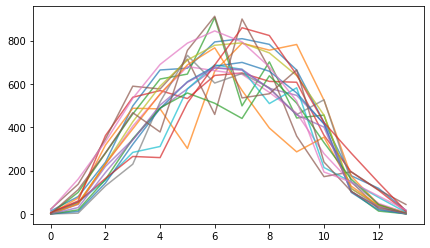

In [15]:
uni = np.unique(knn_pred)
print(uni)
plt.figure(figsize=(7, 4))
j=0
for i in knn_pred:
    if i==0:
      plt.plot(X_test[j],alpha=0.7)
    j = j + 1
plt.show()

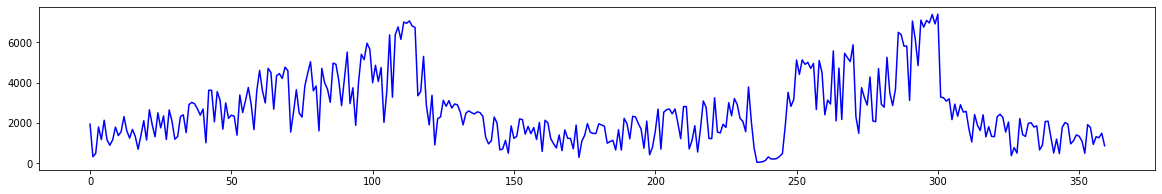

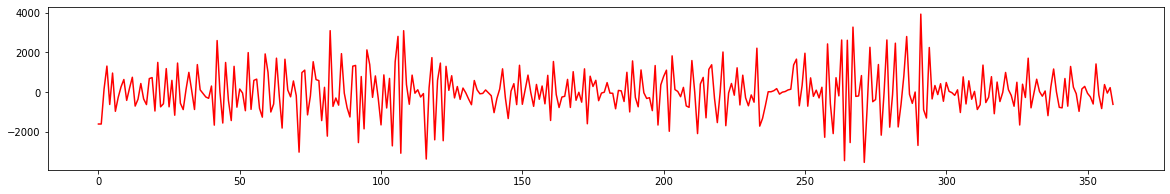

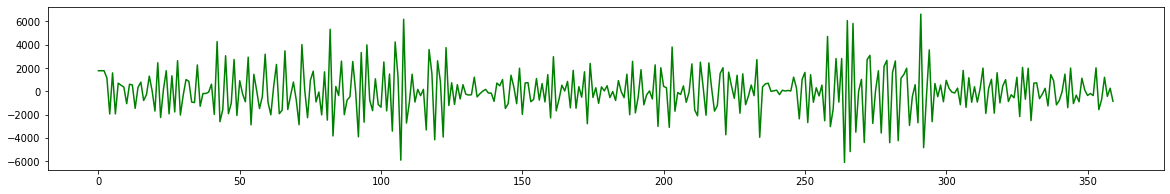

<Figure size 1440x216 with 0 Axes>

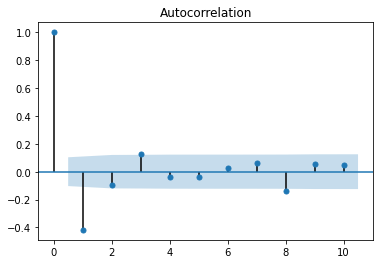

<Figure size 1440x216 with 0 Axes>

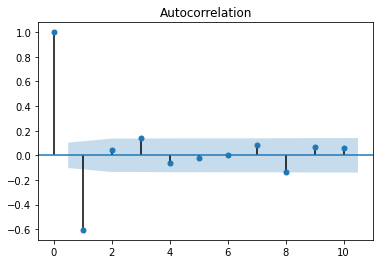

In [16]:
plt.figure(figsize=(20, 3))
plt.plot(x_total,alpha=1,color='blue')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(dx_total,alpha=1,color='red')
plt.show()
plt.figure(figsize=(20, 3))
plt.plot(ddx_total,alpha=1,color='green')
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(dx_total, lags=10)
plt.show()
plt.figure(figsize=(20, 3))
sm.graphics.tsa.plot_acf(ddx_total, lags=10)
plt.show()